# Case 3 Patient Drug Review
Nuttapol Saiboonruen<br>
Last edited: 17.03.2018<br>
Cognitive Systems for Health Technology Applications<br>
[Helsinki Metropolia University of Applied Sciences](https://www.metropolia.fi/en)


## 1. Objectives
1. Learn how to use neural networks to process text data and predict ratings associated to the text.
3. Getting high accuracy(85-90%) of the model that can predict the ratings.
4. Minimize over-fitting of the model.

## 2. Required libraries

### Import libraries
First we import all libraries (or modules) and functions needed in this session.

- `import numpy as np` imports the numpy library and we can use the short notation `np`
- `import pandas as pd` imports the pandas library and we can use the short notation `pd`
- `import matplotlib.pyplot as plt` imports the matplotlib library and we can use the short notation `plt`
-  `from sklearn ...` we import some special functions from scikit-learn module
- `from keras ...` is used for special keras functions



In [1]:
# Read basic libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os

# Show files in directory
print(os.listdir("./data"))

['drugsComTest_raw.csv', 'drugsComTrain_raw.csv']


## 3. Data description and preprocessing

### Import the data
First of all we import the data cleveland from the data source as raw data.<br>
The `date.head()` shows the first 5 rows of the data, The `data.tail()` shows the last 5 rows of the data 

In [2]:
# Read the training and testing data
data = pd.read_csv('./data/drugsComTrain_raw.csv')
test = pd.read_csv('./data/drugsComTest_raw.csv')

# List only reviews of train dataset
train_review=data['review'].values

In [3]:
# find max lenght of sentences in train dataset
max_lenght = max([len(s.split()) for s in train_review])
max_lenght

1894

In [4]:
# Show the head of the data
data.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37


In [5]:
# Show the head of the test data
test.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10,28-Feb-12,22
1,206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8,17-May-09,17
2,159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9,29-Sep-17,3
3,39293,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9,5-Mar-17,35
4,97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9,22-Oct-15,4


### Modify data
From the given data set it has only rating colume from 1-10. But we need only 3 levels of rating 0,1 and 2 to determine sentiments. So, we add new column `label` for keeps rating in range of 0,1 and 2.

In [6]:
# Create labels based on the original article: Grässer et al. (2018)
r = data['rating']
labels = -1*(r <= 4) + 1*(r >= 7)
# Add the label column to the data
data['label'] = labels
# Check the new data
data.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount,label
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27,1
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192,1
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17,0
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10,1
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37,1


In [7]:
# Create labels based on the original article: Grässer et al. (2018)
rt = test['rating']
labelst = -1*(rt <= 4) + 1*(rt >= 7)
# Add the label column to the test
test['label'] = labelst
# Check the new test
test.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount,label
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10,28-Feb-12,22,1
1,206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8,17-May-09,17,1
2,159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9,29-Sep-17,3,1
3,39293,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9,5-Mar-17,35,1
4,97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9,22-Oct-15,4,1


In [8]:
# Show data lenght
len(data)

161297

In [9]:
# Check ratings to labels conversion
import matplotlib.pyplot as plt
data.plot(x = 'rating', y = 'label', kind = 'scatter')
plt.show()

<Figure size 640x480 with 1 Axes>

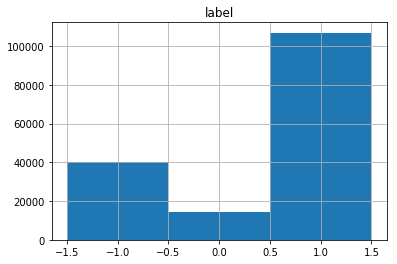

In [10]:
# Plot distribution of train labels
data.hist(column = 'label', bins = np.arange(-1, 3), align = 'left');

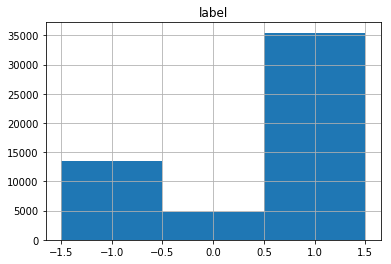

In [11]:
# Plot distribution of test labels
test.hist(column = 'label', bins = np.arange(-1, 3), align = 'left');

### Balancing the train data

From original data it isn't balance when we try to observe the data in each labels. So, we balance them by adding class weight to each labels.

In [12]:
from sklearn.utils import compute_class_weight

# Compute the class weight of each class
w = compute_class_weight('balanced', [-1,0,1], labels)
cw = {2:w[0], 0:w[1], 1:w[2]}

In [13]:
# Show class weight
cw

{2: 1.3416261176959867, 0: 3.745170428160119, 1: 0.5031129327070037}

## Preprocessing
### Convert reviews to padded sequences

First of all we do the text tokenization by using `Tokenizer` to split word in review lower them and add into array in term of index.<br>
After that, we padding review sentences to be equal to the longest sentence of review plus one by using `pad_sequences`. We do it in both train and test data with the same index value.

In [14]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

# Read a part of the reviews and create training sequences (x_train)
samples = data['review'].iloc[:len(data)]
tokenizer = Tokenizer(num_words = 2400, lower=True, split=' ')
tokenizer.fit_on_texts(samples)
sequences = tokenizer.texts_to_sequences(samples)
x_train = pad_sequences(sequences, maxlen = max_lenght+1)

Using TensorFlow backend.


In [15]:
# Read a part of the reviews and create training sequences (x_train)
samples_test = test['review'].iloc[:len(test)]
sequences = tokenizer.texts_to_sequences(samples_test)
x_test = pad_sequences(sequences, maxlen = max_lenght+1)

## Convert labels to one-hot-categories

One hot encoder is use to perform “binarization” of the category and include it as a suitable feature to train the model.<br>

In [16]:
from keras.utils import to_categorical

# Convert the labels to one_hot_category values
one_hot_labels = to_categorical(labels[:len(data)], num_classes = 3)
one_hot_labels_test = to_categorical(labelst[:len(test)], num_classes = 3)

## Check the shapes
We check the shape of test and train dataset

In [17]:
# Check the training and label sets
x_train.shape, one_hot_labels.shape

((161297, 1895), (161297, 3))

In [18]:
# Check the training and label sets
x_test.shape, one_hot_labels_test.shape

((53766, 1895), (53766, 3))

## Helper functions

In [19]:
# We use the same plotting commands several times, so create a function for that purpose
def plot_history(history):
    
    f, ax = plt.subplots(1, 2, figsize = (16, 7))
    
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)

    plt.sca(ax[0])
    plt.ylim((0,1))
    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()

    plt.sca(ax[1])
    plt.ylim((0,1))
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

    plt.show()

### Splite the data

We splited the data to 2 sets that are training set and validation set by train and validation ratio is 80:20 These 2 data sets use to train and evaluate our models.

In [20]:
# Similarly create a function for model training, for demonstration purposes we use constant values
def train_model(model, x, y, e, bs , v = 1, vs = 0.2): # split data for validation 20% of whole dataset
    h = model.fit(x, y, epochs = e, batch_size = bs, verbose = v, validation_split = vs,  class_weight=cw)
    return h

In [21]:
# Similarly create a function for model training, for demonstration purposes we use constant values
def evaluate_model(model, x, y, bs = 128, v = 1):
    score =model.evaluate(x, y, batch_size = bs, verbose = v)
    return score

## 4. Modeling and compilation


In this case I will use the simple sequential architecture that include embedding layer to make the vector of word index, LSTM layer for regression problem like in this case, Convolution 1D layer, GRU layer, flatten layer, fully connected layer and dropout layer for prevent the over-fitting.

We use `rmsprop` optimizer and standard `catagory_crossentropy` loss-function and `accuracy` metrics for muyi-classification.<br>


At first we start learning with the model that professer give as an example indocument and modify them to find the good model.

### Model1 - Embedding and Flatten

In [32]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

# First model: Embedding layer -> Flatten -> Dense classifier
m1 = Sequential()
m1.add(Embedding(4200, 64, input_length = max_lenght+1)) # 1000 = num_words, 64 = Embedding layers, 500 = sequence length
m1.add(Flatten())
m1.add(Dense(32, activation = 'relu'))
m1.add(Dense(3, activation = 'softmax'))
m1.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['acc'])
m1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 1895, 64)          268800    
_________________________________________________________________
flatten_2 (Flatten)          (None, 121280)            0         
_________________________________________________________________
dense_6 (Dense)              (None, 32)                3880992   
_________________________________________________________________
dense_7 (Dense)              (None, 3)                 99        
Total params: 4,149,891
Trainable params: 4,149,891
Non-trainable params: 0
_________________________________________________________________


## 5. Training and Validation

In training this model we run 30 epochs with batch size of 1024 and given validation data seperately. we correct history of each epochs for plotting the accuracy and loss graph to analyse the models.

Train on 129037 samples, validate on 32260 samples
Epoch 1/30
129037/129037 [==============================] - 15s 114us/step - loss: 1.1695 - acc: 0.2582 - val_loss: 1.1104 - val_acc: 0.2451
Epoch 2/30
129037/129037 [==============================] - 14s 107us/step - loss: 1.0958 - acc: 0.2910 - val_loss: 1.1103 - val_acc: 0.6619
Epoch 3/30
129037/129037 [==============================] - 14s 107us/step - loss: 1.0995 - acc: 0.3706 - val_loss: 1.1710 - val_acc: 0.6619
Epoch 4/30
129037/129037 [==============================] - 14s 108us/step - loss: 1.0189 - acc: 0.6672 - val_loss: 0.9929 - val_acc: 0.7267
Epoch 5/30
129037/129037 [==============================] - 15s 113us/step - loss: 0.8698 - acc: 0.6758 - val_loss: 0.9482 - val_acc: 0.5290
Epoch 6/30
129037/129037 [==============================] - 14s 110us/step - loss: 0.8071 - acc: 0.6887 - val_loss: 1.0939 - val_acc: 0.6770
Epoch 7/30
129037/129037 [==============================] - 14s 112us/step - loss: 0.7536 - acc: 0.7062

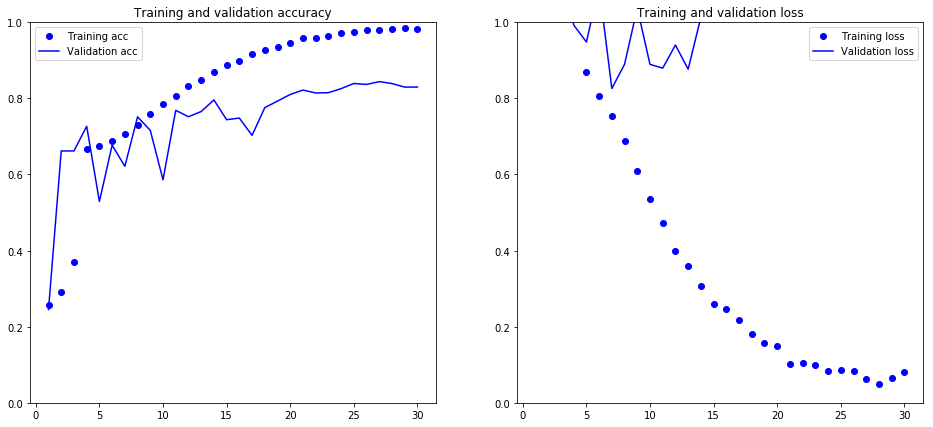

In [43]:
# Train the first model and plot the history
h0 = train_model(m0, x_train, one_hot_labels,30,1024)
plot_history(h0)

### Model 2 - Embedding and GRU with dropout

In [ ]:
# Second model: Embedding -> GRU with dropouts -> Dense classifier
m2 = Sequential()
m2.add(Embedding(4200, 16, input_length = max_lenght+1))
m2.add(GRU(8, dropout = 0.2, recurrent_dropout = 0.2))
m2.add(Dense(3, activation = 'softmax'))
m2.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['acc'])
m2.summary()

Train on 129037 samples, validate on 32260 samples
Epoch 1/10
129037/129037 [==============================] - 165s 1ms/step - loss: 1.0808 - acc: 0.4990 - val_loss: 1.0782 - val_acc: 0.5533
Epoch 2/10
129037/129037 [==============================] - 164s 1ms/step - loss: 1.0323 - acc: 0.5827 - val_loss: 1.0239 - val_acc: 0.6277
Epoch 3/10
129037/129037 [==============================] - 164s 1ms/step - loss: 0.9754 - acc: 0.6346 - val_loss: 0.9905 - val_acc: 0.6550
Epoch 4/10
129037/129037 [==============================] - 165s 1ms/step - loss: 0.9453 - acc: 0.6460 - val_loss: 0.9626 - val_acc: 0.6201
Epoch 5/10
129037/129037 [==============================] - 179s 1ms/step - loss: 0.9248 - acc: 0.6479 - val_loss: 0.9501 - val_acc: 0.6568
Epoch 6/10
129037/129037 [==============================] - 169s 1ms/step - loss: 0.9096 - acc: 0.6465 - val_loss: 0.9408 - val_acc: 0.6128
Epoch 7/10
129037/129037 [==============================] - 166s 1ms/step - loss: 0.8995 - acc: 0.6441 - val_

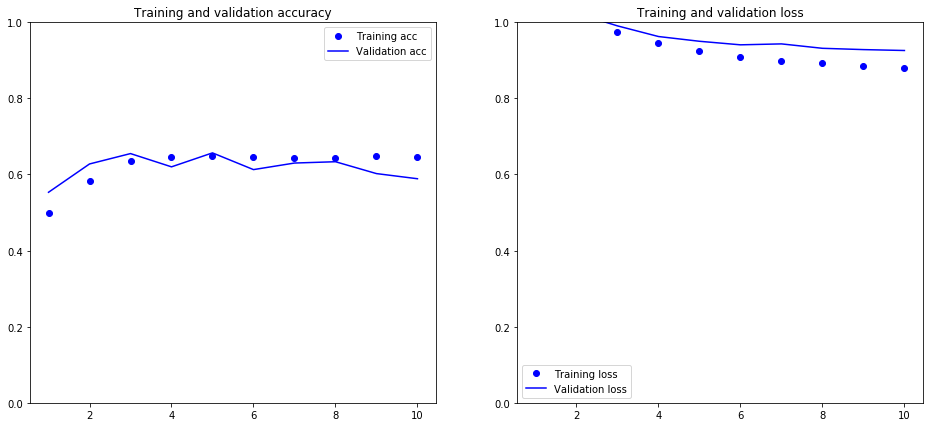

In [31]:
# Train and plot the history
h3 = train_model(m3, x_train, one_hot_labels,10,2048)
plot_history(h3)

In [45]:
score = evaluate_model(m3, x_test, one_hot_labels_test)

53766/53766 [==============================] - 344s 6ms/step


In [49]:
print("Accuracy of Model 2: ", score[1])

Accuracy of Model 2:  0.5863556894713985


### Model 3 - Embedding and mixed Conv1D and GRU

In [44]:
# Third model: Embedding -> 2 x Conv1D + MaxPooling -> GRU -> Dense
m3 = Sequential()
m3.add(Embedding(1000, 32, input_length = 500))
m3.add(Conv1D(32, 5, activation = 'relu'))
m3.add(Conv1D(32, 5, activation = 'relu'))
m3.add(MaxPooling1D(5))
m3.add(Conv1D(32, 7, activation = 'relu'))
m3.add(Conv1D(32, 7, activation = 'relu'))
m3.add(GRU(8, dropout = 0.1, recurrent_dropout = 0.5))
m3.add(Dense(3, activation = 'softmax'))
m3.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['acc'])
m3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 500, 32)           32000     
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 496, 32)           5152      
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 492, 32)           5152      
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 98, 32)            0         
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 92, 32)            7200      
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 86, 32)            7200      
_________________________________________________________________
gru_5 (GRU)                  (None, 8)                 984       
__________

Train on 120972 samples, validate on 40325 samples
Epoch 1/20
120972/120972 [==============================] - 121s 1ms/step - loss: 0.9262 - acc: 0.7285 - val_loss: 0.9675 - val_acc: 0.7254
Epoch 2/20
120972/120972 [==============================] - 120s 996us/step - loss: 0.9135 - acc: 0.7108 - val_loss: 0.9493 - val_acc: 0.6036
Epoch 3/20
120972/120972 [==============================] - 120s 993us/step - loss: 0.8968 - acc: 0.6812 - val_loss: 0.9277 - val_acc: 0.6815
Epoch 4/20
120972/120972 [==============================] - 121s 999us/step - loss: 0.9114 - acc: 0.7326 - val_loss: 0.9438 - val_acc: 0.7145
Epoch 5/20
120972/120972 [==============================] - 120s 995us/step - loss: 0.9136 - acc: 0.7091 - val_loss: 0.9603 - val_acc: 0.7118
Epoch 6/20
120972/120972 [==============================] - 121s 997us/step - loss: 0.9153 - acc: 0.7343 - val_loss: 0.9188 - val_acc: 0.6235
Epoch 7/20
120972/120972 [==============================] - 121s 998us/step - loss: 0.8997 - acc: 0

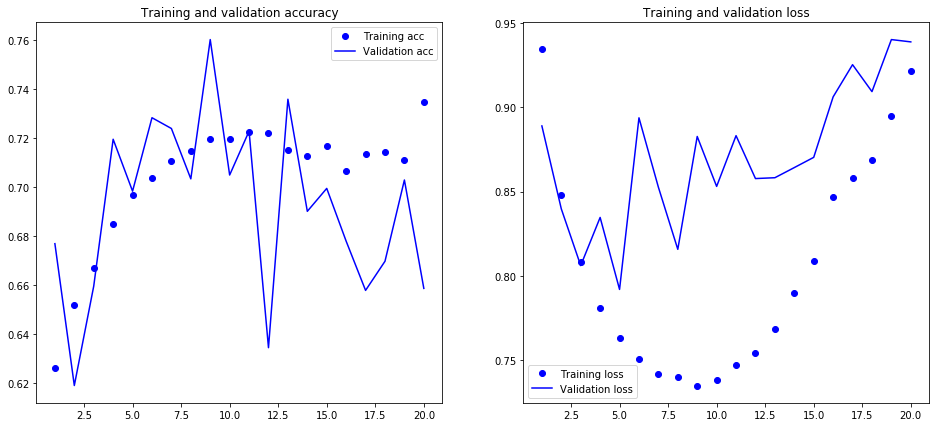

In [25]:
# Train and plot the history
h6 = train_model(m6, x_train, one_hot_labels)
plot_history(h5)

### Model 4 - Embedding and mixed Conv1D and LSTM

In [52]:
# Fourth model: Embedding -> 2 x Conv1D + MaxPooling + Dropout -> LSTM -> Dense
from keras.layers import Dropout,Conv1D,LSTM,MaxPooling1D
m7 = Sequential()
m7.add(Embedding(8400,128, input_length = max_lenght+1))
m7.add(Conv1D(32, 5, activation = 'relu'))
m7.add(MaxPooling1D(5))
m7.add(Dropout(0.4))
m7.add(Conv1D(16,5, activation = 'relu'))
m7.add(MaxPooling1D(5))
m7.add(Dropout(0.4))
m7.add(LSTM(8, dropout = 0.3,recurrent_dropout = 0.5))
m7.add(Dropout(0.3))
m7.add(Dense(3, activation = 'softmax'))
m7.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['acc'])
m7.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, 1895, 128)         1075200   
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 1891, 32)          20512     
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 378, 32)           0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 378, 32)           0         
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 374, 16)           2576      
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 74, 16)            0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 74, 16)            0         
__________

Train on 129037 samples, validate on 32260 samples
Epoch 1/30
129037/129037 [==============================] - 70s 540us/step - loss: 1.0692 - acc: 0.4232 - val_loss: 0.9946 - val_acc: 0.6184
Epoch 2/30
129037/129037 [==============================] - 69s 539us/step - loss: 0.9842 - acc: 0.6266 - val_loss: 0.9871 - val_acc: 0.7157
Epoch 3/30
129037/129037 [==============================] - 71s 552us/step - loss: 0.9551 - acc: 0.6256 - val_loss: 0.9846 - val_acc: 0.6998
Epoch 4/30
129037/129037 [==============================] - 70s 541us/step - loss: 0.9328 - acc: 0.6322 - val_loss: 0.9148 - val_acc: 0.6180
Epoch 5/30
129037/129037 [==============================] - 70s 540us/step - loss: 0.9117 - acc: 0.6422 - val_loss: 0.9082 - val_acc: 0.6507
Epoch 6/30
129037/129037 [==============================] - 70s 541us/step - loss: 0.8934 - acc: 0.6492 - val_loss: 0.8897 - val_acc: 0.6703
Epoch 7/30
129037/129037 [==============================] - 75s 579us/step - loss: 0.8776 - acc: 0.6542

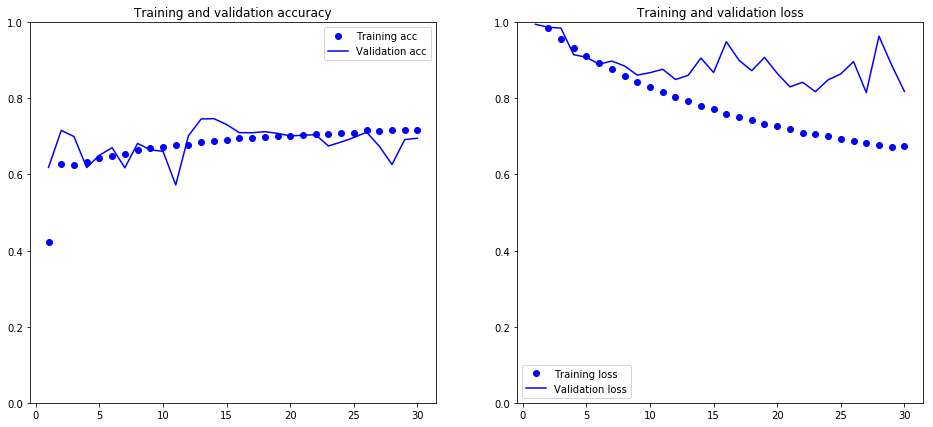

In [53]:
# Train and plot the history
h7 = train_model(m7, x_train, one_hot_labels,30,512)
plot_history(h7)

## 6. Evaluation

In evaluation we calculate the accuracy by using accuracy = number of collect prediction/ Total number of prediction (`model.evaluate`)

In [54]:
score = evaluate_model(m7, x_test, one_hot_labels_test)

53766/53766 [==============================] - 21s 397us/step


In [55]:
print("Accuracy of Model 4: ", score[1])
print("Loss of Model 4: ", score[0])

Accuracy of Model 4:  0.6917382732581929
Loss of Model 4:  0.6968305681834941


## 7. Results and Discussion

Now we visualize the training results. First the loss-function and next the accuracy.<br>
As you can see the accuracy graph below some time we getting a little over fitting model, for the loss function graph our model has low learning rate because the graph have very low slope.

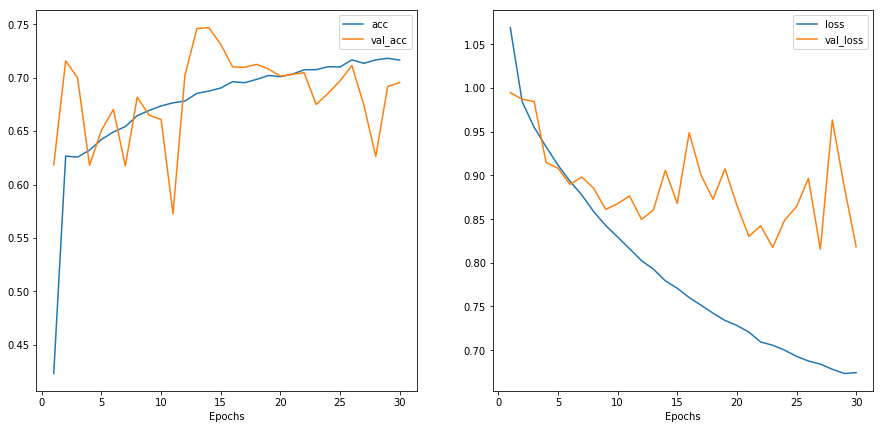

In [57]:
epochs = np.arange(30) + 1.0

f, (ax1, ax2) = plt.subplots(1, 2, figsize = (15,7))

def plotter(ax, epochs, h, variable):
    ax.plot(epochs, h.history[variable], label = variable)
    ax.plot(epochs, h.history['val_' + variable], label = 'val_'+variable)
    ax.set_xlabel('Epochs')
    ax.legend()

plotter(ax1, epochs, h7, 'acc')
plotter(ax2, epochs, h7, 'loss')
plt.show()

## 8. Conclusions

&emsp; In conclusion, it very hard to build the good model in this case with small data set at first time because it has low accuracy and face with overfitting. We decide to use the new bigger data set with 16000 samples. The accuracy of our model increase a bit but we still face with overfitting. I try to build many model to find the best model that have highest accuracy and don't overfit by tuning many parameters. For example, increase number of batch size for reduce the overfit, increase the number of max feature for more complex model. After playing with many model and searching what model that other people use for text sentiment analysis we found the best models that has high accuracy and low overfitting.<br>
&emsp; The best model for now is fourth model, this model has 7 layers (1 embedding layer, 2 convolution layers, 2 MaxPooling layers, 1 LSTM layer, 1 fully connection layer).
 The input is connected to embedding layer, then connected to convolution 1D layer with 32 filters(size 5x1),which connect to 5x1 maxpooling layer, then connected to other convolution 1D layer with 16 filters(size 5x1), which connect to 5x1 maxpooling layer, this two were closed by 2 dropouts with 40%, then connected to LSTM layer with dropout 30%, which connected to fully connected with output 3 as show with `model.summary()` above. The result that we got quite low accuracy but it highest of all model that we tried that is around 72% and quite low over-fitting. For all model we train with 50 epochs and many number of batch size for finding the best model. Our models have quite high learing rate but it's very overfitting and hard to reduce. We try to reduce the overfitting by andding dropout layer the result is good, overfitting is lower but the accuracy is lower too and training loss isn't lower than 65%.<br>
&emsp; for this work we had study and know more about text sentiment analysis with using convolution, GRU, LSTM and come up with the small and simple model that have satisfied accuracy but very overfitting. For some big model it doesn't have high accuracy every time base on many parameters(number of data, epochs, batch size, step per epoch etc.) but sometime it has lower overfitting than small model and it take time to training the model than first two case that is binary classification. If we have more time to train and test we will get the better model and higher accuracy too. 